In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [9]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [25]:
X=iris.data
print(x)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]
 [3.4 1.7]
 [3.7 1.5]
 [3.6 1. ]
 [3.3 1.7]
 [3.4 1.9]
 [3.  1.6]
 [3.4 1.6]
 [3.5 1.5]
 [3.4 1.4]
 [3.2 1.6]
 [3.1 1.6]
 [3.4 1.5]
 [4.1 1.5]
 [4.2 1.4]
 [3.1 1.5]
 [3.2 1.2]
 [3.5 1.3]
 [3.6 1.4]
 [3.  1.3]
 [3.4 1.5]
 [3.5 1.3]
 [2.3 1.3]
 [3.2 1.3]
 [3.5 1.6]
 [3.8 1.9]
 [3.  1.4]
 [3.8 1.6]
 [3.2 1.4]
 [3.7 1.5]
 [3.3 1.4]
 [3.2 4.7]
 [3.2 4.5]
 [3.1 4.9]
 [2.3 4. ]
 [2.8 4.6]
 [2.8 4.5]
 [3.3 4.7]
 [2.4 3.3]
 [2.9 4.6]
 [2.7 3.9]
 [2.  3.5]
 [3.  4.2]
 [2.2 4. ]
 [2.9 4.7]
 [2.9 3.6]
 [3.1 4.4]
 [3.  4.5]
 [2.7 4.1]
 [2.2 4.5]
 [2.5 3.9]
 [3.2 4.8]
 [2.8 4. ]
 [2.5 4.9]
 [2.8 4.7]
 [2.9 4.3]
 [3.  4.4]
 [2.8 4.8]
 [3.  5. ]
 [2.9 4.5]
 [2.6 3.5]
 [2.4 3.8]
 [2.4 3.7]
 [2.7 3.9]
 [2.7 5.1]
 [3.  4.5]
 [3.4 4.5]
 [3.1 4.7]
 [2.3 4.4]
 [3.  4.1]
 [2.5 4. ]
 [2.6 4.4]

In [11]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
des = iris.DESCR
print(des)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
le = LabelEncoder()
y_new = le.fit_transform(y)
print(y_new)
x_train,x_test,y_train,y_test = train_test_split(x,y_new,test_size=.25)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 0 1 2 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 0 1 2 1 2 0 1 2 1 1 1 2
 2]


In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print("------------------Test class -------\n",y_test)
print("\n-----------------Predict class ---------\n",y_predict)

------------------Test class -------
 [1 1 0 1 2 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 0 1 2 1 2 0 1 2 1 1 1 2
 2]

-----------------Predict class ---------
 [1 1 0 1 2 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 0 1 2 2 2 0 1 2 1 1 1 2
 2]


In [18]:
print(X_test)

[[6.1 2.8 4.7]
 [5.7 3.8 1.7]
 [7.7 2.6 6.9]
 [6.  2.9 4.5]
 [6.8 2.8 4.8]
 [5.4 3.4 1.5]
 [5.6 2.9 3.6]
 [6.9 3.1 5.1]
 [6.2 2.2 4.5]
 [5.8 2.7 3.9]
 [6.5 3.2 5.1]
 [4.8 3.  1.4]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [5.1 3.8 1.5]
 [6.3 3.3 4.7]
 [6.5 3.  5.8]
 [5.6 2.5 3.9]
 [5.7 2.8 4.5]
 [6.4 2.8 5.6]
 [4.7 3.2 1.6]
 [6.1 3.  4.9]
 [5.  3.4 1.6]
 [6.4 2.8 5.6]
 [7.9 3.8 6.4]
 [6.7 3.  5.2]
 [6.7 2.5 5.8]
 [6.8 3.2 5.9]
 [4.8 3.  1.4]
 [4.8 3.1 1.6]
 [4.6 3.6 1. ]
 [5.7 4.4 1.5]
 [6.7 3.1 4.4]
 [4.8 3.4 1.6]
 [4.4 3.2 1.3]
 [6.3 2.5 5. ]
 [6.4 3.2 4.5]
 [5.2 3.5 1.5]]


In [19]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
print(y_train)

[0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]


In [26]:
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [31]:
y_predict = knn.predict(X_test)


[1 0 0 0 1 0 0 2 0 1 2 1 0 1 0 1 2 1 0 1 1 1 0 1 0 2 2 2 1 1 1 0 0 0 2 0 0
 0]


In [32]:
print(y_test)

[1 1 0 1 2 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 0 1 2 1 2 0 1 2 1 1 1 2
 2]


In [33]:
print("predicted")
print(y_predict)
print("test")
print(y_test)

predicted
[1 0 0 0 1 0 0 2 0 1 2 1 0 1 0 1 2 1 0 1 1 1 0 1 0 2 2 2 1 1 1 0 0 0 2 0 0
 0]
test
[1 1 0 1 2 1 2 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 0 2 1 0 1 2 1 2 0 1 2 1 1 1 2
 2]


In [34]:
print(knn.predict_proba(X_test))

[[0.28571429 0.57142857 0.14285714]
 [0.42857143 0.28571429 0.28571429]
 [0.57142857 0.28571429 0.14285714]
 [0.42857143 0.42857143 0.14285714]
 [0.28571429 0.42857143 0.28571429]
 [0.42857143 0.28571429 0.28571429]
 [0.57142857 0.14285714 0.28571429]
 [0.28571429 0.28571429 0.42857143]
 [0.57142857 0.28571429 0.14285714]
 [0.28571429 0.57142857 0.14285714]
 [0.         0.28571429 0.71428571]
 [0.14285714 0.42857143 0.42857143]
 [0.42857143 0.42857143 0.14285714]
 [0.14285714 0.42857143 0.42857143]
 [0.42857143 0.42857143 0.14285714]
 [0.28571429 0.57142857 0.14285714]
 [0.14285714 0.14285714 0.71428571]
 [0.28571429 0.42857143 0.28571429]
 [0.57142857 0.28571429 0.14285714]
 [0.14285714 0.42857143 0.42857143]
 [0.14285714 0.42857143 0.42857143]
 [0.         0.71428571 0.28571429]
 [0.57142857 0.14285714 0.28571429]
 [0.14285714 0.42857143 0.42857143]
 [0.57142857 0.14285714 0.28571429]
 [0.28571429 0.14285714 0.57142857]
 [0.14285714 0.28571429 0.57142857]
 [0.14285714 0.14285714 0.71

In [35]:
print(accuracy_score(y_test,y_predict,normalize='false'))

0.2631578947368421


[[4 3 3]
 [7 5 3]
 [6 6 1]]


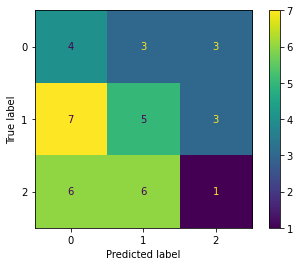

In [36]:
cm=confusion_matrix(y_test,y_predict)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
print(cm)
display.plot()
plt.show()